## Dataset Cleaning, Transformation, and Exploration

### Import Necessary Libraries, Load and Inspect the Dataset

In [17]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

# Load the dataset
file_path = 'Customer_Segmentation_py.csv'  # Ensure the file is in the same directory as this notebook
df = pd.read_csv(file_path)

# Inspect the dataset
df.info()  # To check the columns and their data types
df.head()  # To see the first few rows of the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113036 entries, 0 to 113035
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Date              113036 non-null  object
 1   Day               113036 non-null  int64 
 2   Month             113036 non-null  object
 3   Year              113036 non-null  int64 
 4   Customer_Age      113036 non-null  int64 
 5   Age_Group         113036 non-null  object
 6   Customer_Gender   113036 non-null  object
 7   Country           113036 non-null  object
 8   State             113036 non-null  object
 9   Product_Category  113036 non-null  object
 10  Sub_Category      113036 non-null  object
 11  Product           113036 non-null  object
 12  Order_Quantity    113036 non-null  int64 
 13  Unit_Cost         113036 non-null  int64 
 14  Unit_Price        113036 non-null  int64 
 15  Profit            113036 non-null  int64 
 16  Cost              113036 non-null  int

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
0,26/11/2013,26,November,2013,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
1,26/11/2015,26,November,2015,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
2,23/03/2014,23,March,2014,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,23,45,120,1366,1035,2401
3,23/03/2016,23,March,2016,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,20,45,120,1188,900,2088
4,15/05/2014,15,May,2014,47,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,4,45,120,238,180,418


### Data Cleaning and Feature Engineering

In [19]:
# Data Cleaning
# There are no missing values as seen by the df.info() display above.

# Handle duplicates
df.drop_duplicates(inplace=True)  # Remove duplicate rows if any

# Drop redundant/irrelevant columns: Drop Day, Year, State, and Product columns
df.drop(columns=['Day', 'Year', 'State', 'Product'], inplace=True)

# Add Customer Spending Group
spending_bins = [0, 500, 1000, 2000, 5000, float('inf')]
spending_labels = ['Very Low', 'Low', 'Medium', 'High', 'Very High']
df['Customer_Spending_Group'] = pd.cut(df['Revenue'], bins=spending_bins, labels=spending_labels, right=False)

df.info()
# Display the first few rows
df.head()

<class 'pandas.core.frame.DataFrame'>
Index: 112036 entries, 0 to 113035
Data columns (total 15 columns):
 #   Column                   Non-Null Count   Dtype   
---  ------                   --------------   -----   
 0   Date                     112036 non-null  object  
 1   Month                    112036 non-null  object  
 2   Customer_Age             112036 non-null  int64   
 3   Age_Group                112036 non-null  object  
 4   Customer_Gender          112036 non-null  object  
 5   Country                  112036 non-null  object  
 6   Product_Category         112036 non-null  object  
 7   Sub_Category             112036 non-null  object  
 8   Order_Quantity           112036 non-null  int64   
 9   Unit_Cost                112036 non-null  int64   
 10  Unit_Price               112036 non-null  int64   
 11  Profit                   112036 non-null  int64   
 12  Cost                     112036 non-null  int64   
 13  Revenue                  112036 non-null  int64  

,Date,Month,Customer_Age,Age_Group,Customer_Gender,Country,Product_Category,Sub_Category,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue,Customer_Spending_Group
0,26/11/2013,November,19,Youth (<25),M,Canada,Accessories,Bike Racks,8,45,120,590,360,950,Low
1,26/11/2015,November,19,Youth (<25),M,Canada,Accessories,Bike Racks,8,45,120,590,360,950,Low
2,23/03/2014,March,49,Adults (35-64),M,Australia,Accessories,Bike Racks,23,45,120,1366,1035,2401,High
3,23/03/2016,March,49,Adults (35-64),M,Australia,Accessories,Bike Racks,20,45,120,1188,900,2088,High
4,15/05/2014,May,47,Adults (35-64),F,Australia,Accessories,Bike Racks,4,45,120,238,180,418,Very Low


### Exploratory Data Analysis (EDA)

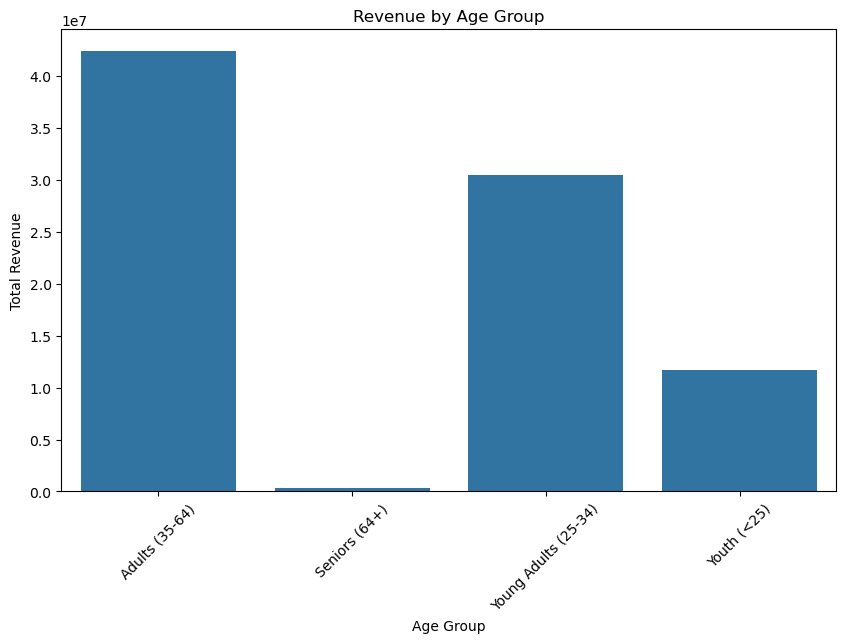

In [21]:
#Revenue by age group
age_group_revenue = df.groupby('Age_Group')['Revenue'].sum().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='Age_Group', y='Revenue', data=age_group_revenue)
plt.title('Revenue by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.show()

The revenue distribution by age group reveals that adults aged 35-64 generate the highest revenue, likely due to established careers and discretionary spending. The 25-34 age group follows closely, contributing significantly due to early-to-mid career stages, household formation, and major life purchases such as homes and technology. Youth below 25 years generate the third-highest revenue, driven by their evolving purchasing power. Seniors above 64 years generate the least revenue, likely due to retirement and limited disposable income especially on biking activities. Targeting these key groups with tailored marketing strategies could further optimize revenue generation across demographics.


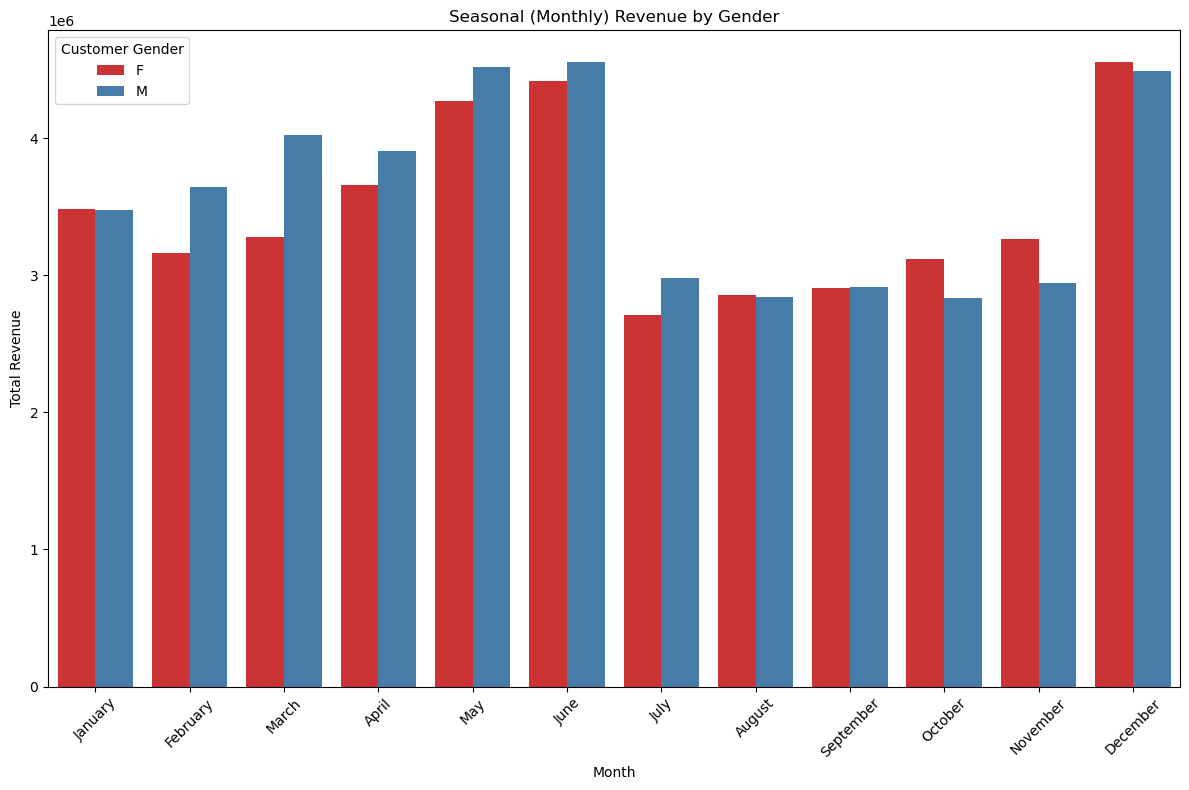

In [23]:
# Seasonal (Monthly) Revenue by Gender
month_order = [
    'January', 'February', 'March', 'April', 'May', 'June', 
    'July', 'August', 'September', 'October', 'November', 'December'
]

# Group the data by Month and Customer_Gender, aggregating Revenue
revenue_gender_month = df.groupby(['Month', 'Customer_Gender'])['Revenue'].sum().reset_index()

# Convert the 'Month' column to a categorical type with the specified order
revenue_gender_month['Month'] = pd.Categorical(revenue_gender_month['Month'], categories=month_order, ordered=True)

# Sort the data by Month for proper visualization
revenue_gender_month.sort_values('Month', inplace=True)

# Plot the data using a bar plot
plt.figure(figsize=(12, 8))
sns.barplot(
    x='Month', 
    y='Revenue', 
    hue='Customer_Gender', 
    data=revenue_gender_month, 
    palette='Set1', 
    errorbar=None
)

# Add labels and title
plt.title('Seasonal (Monthly) Revenue by Gender')
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)  # Rotate x-axis labels for readability
plt.legend(title='Customer Gender')
plt.tight_layout()
plt.show()

The seasonal spikes in revenue observed in May, June, and December suggest distinct purchasing behaviours linked to holidays and special events. Men tend to lead during the peak months of May and June, possibly due to events like Father's Day or early summer sales, while women lead in December, likely influenced by the holiday shopping season and end-of-year promotions. The lower revenue months (July to November) might reflect post-summer and pre-holiday periods when consumer spending typically slows. To leverage these trends, targeted marketing campaigns could be designed around these high-revenue months with gender-specific offers to maximize engagement.


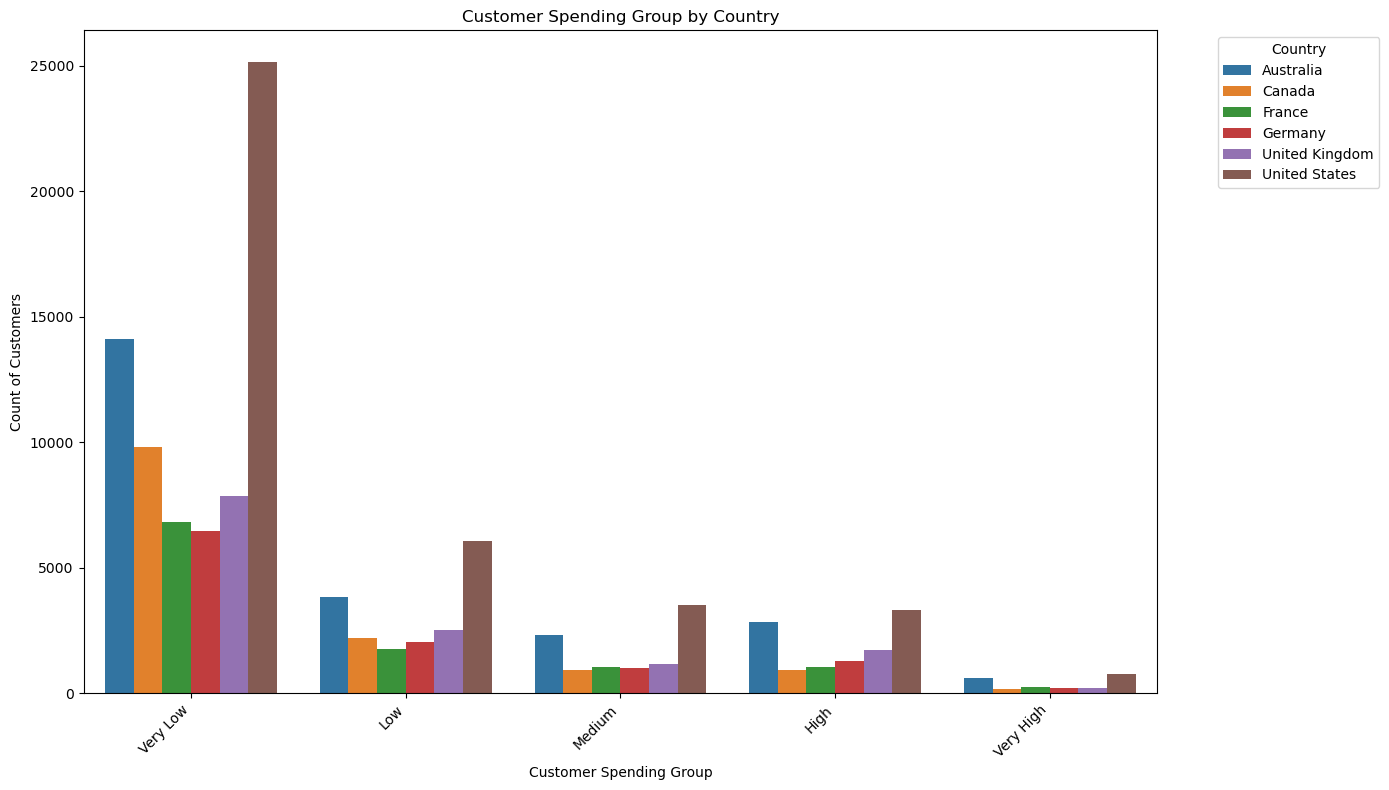

In [25]:
# Grouping data by Customer_Spending_Group and Country
spending_by_country = df.groupby(['Customer_Spending_Group', 'Country'], observed=False).size().reset_index(name='Count')

# Sorting the data for better readability in the plot
spending_by_country.sort_values(['Customer_Spending_Group', 'Country'], inplace=True)

# Plotting the data
plt.figure(figsize=(14, 8))
sns.barplot(
    x='Customer_Spending_Group', 
    y='Count', 
    hue='Country', 
    data=spending_by_country, 
    palette='tab10', 
    errorbar=None
)

# Adding labels and title
plt.title('Customer Spending Group by Country')
plt.xlabel('Customer Spending Group')
plt.ylabel('Count of Customers')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')  # Adjust legend position
plt.tight_layout()
plt.show()

United states and Australia have the highest population of spenders in the biking section, hence have the highest numbers in every customer spending group. While the United States and Australia lead in overall numbers due to their higher populations of spenders, Australia stands out with a larger percentage of its spending population falling in the High and Very High spending categories compared to the United States. This could suggest that Australian customers are more inclined to make high-value purchases in the biking section, potentially due to cultural or market-specific factors. Conversely, Canada, France, Germany, and the United Kingdom show lower engagement in the biking category, possibly reflecting regional differences in interest or market penetration for biking-related products. These insights could guide more targeted marketing efforts, particularly in Australia, to cater to the high-value spender demographic.


### Data Transformation

In [27]:
# Data Transformation (Scaling)
scaler = MinMaxScaler()
scaling_columns = ['Order_Quantity', 'Unit_Cost', 'Unit_Price', 'Profit', 'Revenue', 'Cost']  # Relevant columns for normalization
df[scaling_columns] = scaler.fit_transform(df[scaling_columns])
df.head()

,Date,Month,Customer_Age,Age_Group,Customer_Gender,Country,Product_Category,Sub_Category,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue,Customer_Spending_Group
0,26/11/2013,November,19,Youth (<25),M,Canada,Accessories,Bike Racks,0.225806,0.020276,0.032998,0.040989,0.008353,0.016325,Low
1,26/11/2015,November,19,Youth (<25),M,Canada,Accessories,Bike Racks,0.225806,0.020276,0.032998,0.040989,0.008353,0.016325,Low
2,23/03/2014,March,49,Adults (35-64),M,Australia,Accessories,Bike Racks,0.709677,0.020276,0.032998,0.092291,0.024059,0.041311,High
3,23/03/2016,March,49,Adults (35-64),M,Australia,Accessories,Bike Racks,0.612903,0.020276,0.032998,0.080524,0.020918,0.035921,High
4,15/05/2014,May,47,Adults (35-64),F,Australia,Accessories,Bike Racks,0.096774,0.020276,0.032998,0.017718,0.004165,0.007164,Very Low


### Correlation Matrix

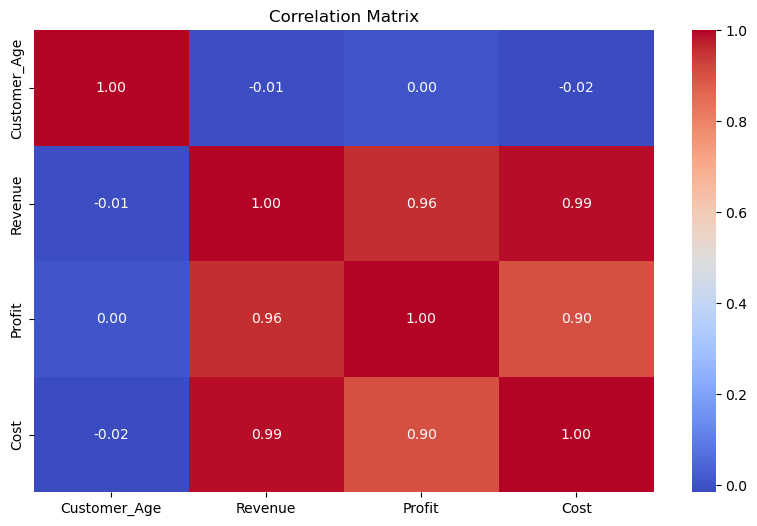

In [29]:
# Add only numerical columns relevant to the dataset
plt.figure(figsize=(10, 6))
corr_matrix = df[['Customer_Age', 'Revenue', 'Profit', 'Cost']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

The heatmap shows a strong positive correlation between Revenue and Cost, as well as Revenue and Profit, indicating that increased revenue directly impacts both cost and profitability. However, Customer Age shows minimal correlation with the other variables, suggesting that age alone does not significantly drive revenue, profit, or cost. Businesses should focus on cost management to enhance profits while considering additional variables for age-based targeting.


### Data Quality Assessment

In [31]:
# Checking for any data inconsistencies
df.describe()  # Get summary statistics to check for any anomalies

,Customer_Age,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
count,112036.000000,112036.000000,112036.000000,112036.000000,112036.000000,112036.000000,112036.000000
mean,35.919508,0.351750,0.122958,0.126356,0.020894,0.010938,0.013003
std,11.016543,0.308544,0.253557,0.258040,0.030071,0.020638,0.022594
min,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,28.000000,0.032258,0.000461,0.000839,0.003901,0.000628,0.001068
50%,35.000000,0.290323,0.003687,0.006432,0.008793,0.002583,0.003857
75%,43.000000,0.612903,0.018894,0.019016,0.025783,0.010261,0.013845
max,87.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Save the Cleaned and Transformed Dataset

In [35]:
# Save the cleaned and transformed dataset
df.to_csv('Cleaned_Customer_Segmentation.csv', index=False)